<img src="images/course-banner.png">

# Cat Classification with Tensorflow 2.0 

## Level: Beginner

In this short hands-on activity, you will build a simple cat neural network classifier with Tensorlow 2.0

1. Build a neural network that classifies cat images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

## Note ##
The dataset used is provided by this kaggle repository https://www.kaggle.com/tongpython/cat-and-dog

## Import Libraries ##

In [37]:
#import tensorflow
import tensorflow as tf
#check the version of tensorflow, make sure it version 2.0 and above
print (tf.__version__)

2.0.0


In [38]:
#import pillow
from PIL import Image
from random import shuffle, choice
#import numpy arrays libraries
import numpy as np
#import operating system library
import os

#import keras and its libraries
from tensorflow.keras import datasets, layers, models

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# TESTING YOUR MODELS #

In [39]:
import tensorflow as tf
from PIL import Image
from random import shuffle, choice
import numpy as np
import os
from tensorflow.keras import datasets, layers, models

In [40]:
IMAGE_SIZE = 256

def one_hot_encode(class_name):
    if class_name == 'cats': return np.array([1, 0])
    elif class_name == 'notcats' : return np.array([0, 1])

In [41]:
IMAGE_DIRECTORY = 'dataset/test_set'
def load_data(IMAGE_DIRECTORY, number_of_images=100,shuffle_data=True):
    print("Loading images...")
    train_data = []
    folders = next(os.walk(IMAGE_DIRECTORY))[1]

    for folder_name in folders:
        print("Loading {0}".format(folder_name))
        file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, folder_name)))[2]

        for i in range(number_of_images):
            image_name = choice(file_names)
            image_path = os.path.join(IMAGE_DIRECTORY, folder_name, image_name)
            #print(image_path)
            label = one_hot_encode(folder_name)
            class_name=folder_name
            if "DS_Store" not in image_path:
                img = Image.open(image_path)
                img = img.convert('L')
                img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
                train_data.append([np.array(img), label,class_name])
    
    if (shuffle_data==True):
        shuffle(train_data)
    print('we loaded ',len(train_data),'images in the dataset')
    return train_data

In [42]:
test_data = load_data(IMAGE_DIRECTORY, number_of_images=100,shuffle_data=True)
test_images = np.array([i[0] for i in test_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
test_labels = np.array([i[1] for i in test_data])

Loading images...
Loading cats
Loading notcats
we loaded  200 images in the dataset


In [43]:
print('Loading model...')
model = tf.keras.models.load_model("model_cnn.h5")

Loading model...


In [44]:
print('Testing model...')
loss, acc = model2.evaluate(test_images, test_labels, verbose=0)


Testing model...


In [45]:
print("accuracy: {0}".format(acc * 100))

accuracy: 66.50000214576721


notcats


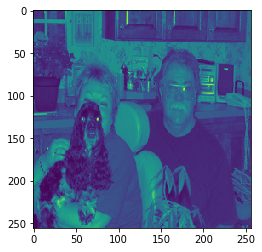

In [46]:
import matplotlib.pyplot as plt
#plt.imshow(test_images[0][0])

image_index=49

label = test_data[image_index][2]
print (label)
image = plt.imshow(test_data[image_index][0])

In [47]:
#batch_holder = np.zeros((20, IMAGE_SIZE, IMAGE_SIZE, 3))
#print(batch_holder)
img = np.reshape(test_data[0][0],[IMAGE_SIZE* IMAGE_SIZE,1])
print(img)

[[157]
 [155]
 [154]
 ...
 [129]
 [117]
 [110]]


In [48]:
print (test_data[image_index][0].shape)
img = test_data[image_index][0]

(256, 256)


In [49]:
img = img.reshape(1,IMAGE_SIZE,IMAGE_SIZE,1).astype('float')
#img /= 255

pred = model.predict(img)
prediction = model2.predict(img)
print(prediction)

[[0.80067116 0.1993289 ]]


In [50]:
if (prediction[0][0]>prediction[0][1]):
    print ('CAT')
else:
    print ('NOT CAT')

CAT
